# Ice Out Dates

Records of 'ice-out' and 'ice-in' days on selected Minnesota lakes are available from the Minnesota DNR at their web site [Ice Out Dates](http://www.dnr.state.mn.us/ice_out/index.html). The customs for determining ice-out and ice-in vary from lake to lake, so it's difficult to compare across different lakes. The DNR does attempt to use the same observers and criteria for each lake so longitudinal data series can provide useful insights.

## Initialization

### Load Python Modules

In [11]:
# Display graphics inline with the notebook
%matplotlib inline

# Standard Python modules
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import os
import datetime
import seaborn as sns
sns.set_context('talk')

# Statistics modules
import statsmodels.api as sm

In [12]:
# Directory where data files are stored
dir = "../data/"
img = "../images/"

## Rainy Lake

In [99]:
# Read .csv file
RL_ICEOUT = pd.read_csv(dir + 'IceOut_RL.txt',index_col=0,parse_dates=True,skiprows=1);

# Remove duplicated data
RL_ICEOUT = RL_ICEOUT[RL_ICEOUT[' source']=='MNDNR-SCO']

# Drop unneeded columns
RL_ICEOUT.drop(' source',1,inplace=True)
RL_ICEOUT.drop(' comments',1,inplace=True)

# Create a new independent variable that counts years from the first date in the data set
RL_ICEOUT['DOY'] = RL_ICEOUT.index.dayofyear
RL_ICEOUT['n'] = pd.Series(np.arange(0.0, len(RL_ICEOUT)), index=RL_ICEOUT.index)

RL_ICEOUT.head()

,DOY,n
ice out date,,
1930-05-03,123,0.0
1931-05-05,125,1.0
1932-05-07,128,2.0
1933-05-06,126,3.0
1934-05-06,126,4.0


const    126.906175
n         -0.081787
dtype: float64
                            OLS Regression Results                            
Dep. Variable:                    DOY   R-squared:                       0.055
Model:                            OLS   Adj. R-squared:                  0.044
Method:                 Least Squares   F-statistic:                     4.913
Date:                Thu, 22 Jun 2017   Prob (F-statistic):             0.0294
Time:                        12:48:09   Log-Likelihood:                -305.00
No. Observations:                  86   AIC:                             614.0
Df Residuals:                      84   BIC:                             618.9
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [95.0% Conf. Int.]
----------------------------------------------------------------------------

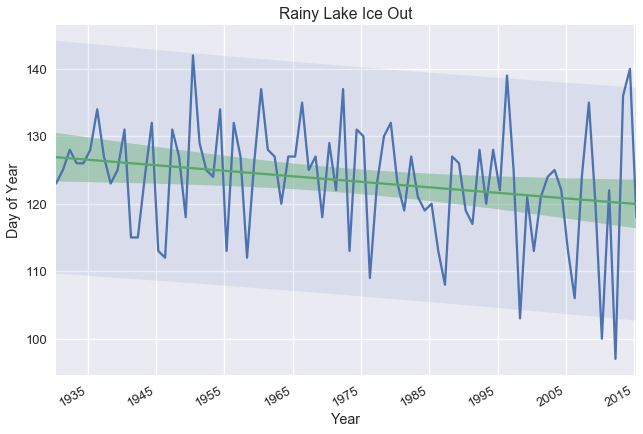

In [117]:
# regression

y = RL_ICEOUT['DOY']
x = RL_ICEOUT['n']

def regress(y,x):
    model = sm.OLS(y,sm.add_constant(x))
    results = model.fit()
    print(results.params)
    print(results.summary())
    
    y.plot()
    plt.plot(y.index,results.fittedvalues)

    # plot the prediction interval (i.e., confidence interval for any particular date)
    from statsmodels.sandbox.regression.predstd import wls_prediction_std
    sdev,lower,upper = wls_prediction_std(results,alpha=0.05)
    ax = plt.gca()
    ax.fill_between(y.index,lower,upper,alpha=0.1)

    # plot confidence interval of the regression
    from scipy import stats
    t = stats.t.ppf(1-0.025,df=len(x)-results.df_model-1)
    conf = t*np.sqrt(np.sum(results.resid**2)/(len(x)-2))*np.sqrt(1.0/n + (x-x.mean())**2/np.sum((x-x.mean())**2))
    ax.fill_between(y.index,results.fittedvalues-conf,results.fittedvalues+conf,alpha=0.4)
    
    plt.xlabel('Year')
    plt.ylabel('Day of Year')
  
regress(y,x)

# add labels
plt.title('Rainy Lake Ice Out')

fname = '../images/IceOut_RL.png'
plt.savefig(fname)
!convert $fname -trim $fname

# get current axis for use in plotting data from other lakes
rl = plt.gca()

The relatively long data series for Rainy Lake provides a statistically signficant trend line. The ice-out day is consistently getting earlier and, at the some time, becoming more variable. Thus in the last few years, Rainy Lake has set earliest ice-out records and nearly broken lastest ice-out records.

## Kabetogoma Lake

const    120.137931
n         -0.203339
dtype: float64
                            OLS Regression Results                            
Dep. Variable:                    DOY   R-squared:                       0.024
Model:                            OLS   Adj. R-squared:                 -0.014
Method:                 Least Squares   F-statistic:                    0.6273
Date:                Thu, 22 Jun 2017   Prob (F-statistic):              0.436
Time:                        12:49:02   Log-Likelihood:                -105.77
No. Observations:                  28   AIC:                             215.5
Df Residuals:                      26   BIC:                             218.2
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [95.0% Conf. Int.]
----------------------------------------------------------------------------

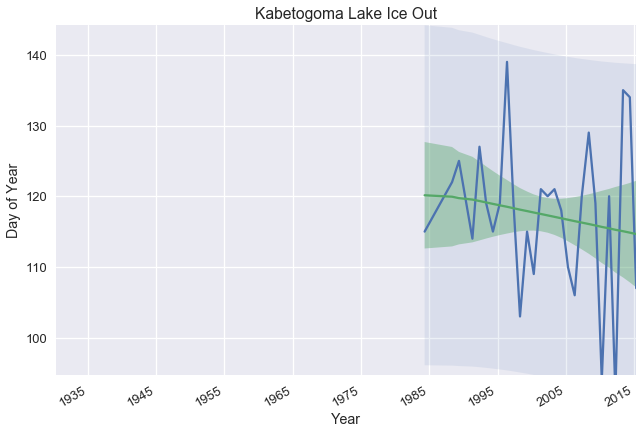

In [119]:
# Read .csv file
KL_ICEOUT = pd.read_csv(dir + 'IceOut_KL.txt',index_col=0,parse_dates=True,skiprows=1)

# Remove duplicated data
KL_ICEOUT = KL_ICEOUT[KL_ICEOUT[' source']=='MNDNR-SCO']

# Drop unneeded columns
KL_ICEOUT.drop(' source',1,inplace=True)
KL_ICEOUT.drop(' comments',1,inplace=True)

# Determine Trend Line
KL_ICEOUT['DOY'] = KL_ICEOUT.index.dayofyear
KL_ICEOUT['n'] = pd.Series(np.arange(0, len(KL_ICEOUT)), index=KL_ICEOUT.index)

y = KL_ICEOUT['DOY']
x = KL_ICEOUT['n']

regress(y,x)

plt.title('Kabetogoma Lake Ice Out')
plt.ylabel('Day of Year')
plt.xlabel('Year')

plt.axis(rl.axis())

fname = img + 'IceOut_KL.png'

plt.savefig(fname)
!convert $fname -trim $fname


## Lake of the Woods

const    118.825123
n          0.118774
dtype: float64
                            OLS Regression Results                            
Dep. Variable:                    DOY   R-squared:                       0.009
Model:                            OLS   Adj. R-squared:                 -0.029
Method:                 Least Squares   F-statistic:                    0.2272
Date:                Thu, 22 Jun 2017   Prob (F-statistic):              0.638
Time:                        13:24:59   Log-Likelihood:                -104.93
No. Observations:                  28   AIC:                             213.9
Df Residuals:                      26   BIC:                             216.5
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [95.0% Conf. Int.]
----------------------------------------------------------------------------

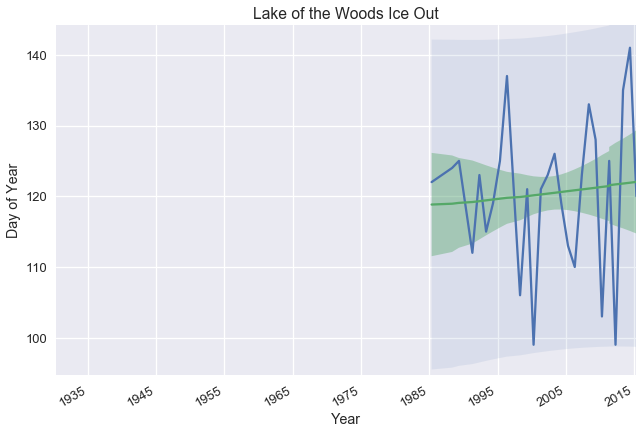

In [122]:
# Read .csv file
LOW_ICEOUT = pd.read_csv(dir + 'IceOut_LOW.txt',index_col=0,parse_dates=True,skiprows=1);

# Remove duplicated data
LOW_ICEOUT = LOW_ICEOUT[LOW_ICEOUT[' source']=='MNDNR-SCO']

# Drop unneeded columns
LOW_ICEOUT.drop(' source',1,inplace=True)
LOW_ICEOUT.drop(' comments',1,inplace=True)

# Determine Trend Line
LOW_ICEOUT['DOY'] = LOW_ICEOUT.index.dayofyear
LOW_ICEOUT['n'] = pd.Series(np.arange(0, len(LOW_ICEOUT)), index=LOW_ICEOUT.index)

y = LOW_ICEOUT['DOY']
x = LOW_ICEOUT['n']

regress(y,x)

plt.title('Lake of the Woods Ice Out')
plt.ylabel('Day of Year')
plt.xlabel('Year')
plt.axis(rl.axis())

fname = img + 'IceOut_LOW.png'

plt.savefig(fname)
!convert $fname -trim $fname